In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def make_wave(n_samples=100):
    import numpy as np
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

In [27]:
x, y = make_wave()
line = np.linspace(-3,3,1000) #테스트입력을 위한 X

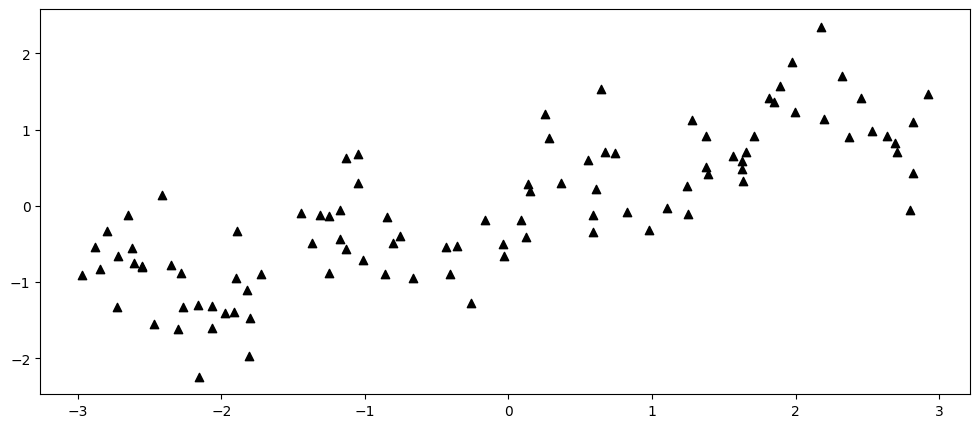

In [22]:
plt.figure(figsize=(12, 5))
plt.scatter(x[:,0], y, c='black', marker= '^')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [25]:
model_L = LinearRegression()
model_L.fit(x, y)

model_D = DecisionTreeRegressor()
model_D.fit(x, y)

DecisionTreeRegressor()

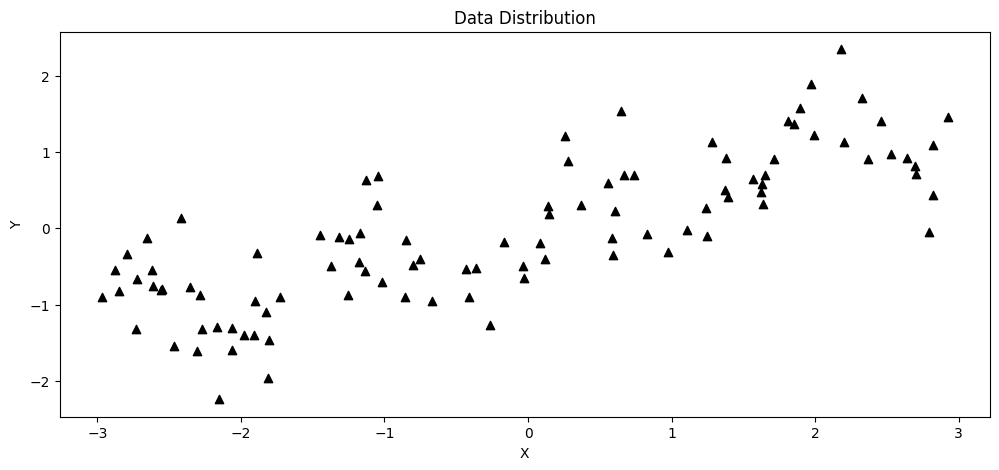

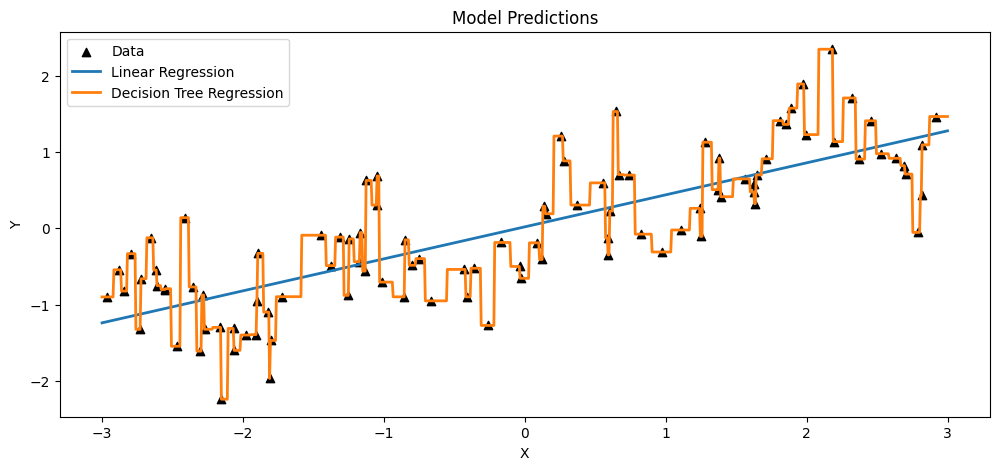

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 데이터 생성 함수
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

# 데이터 생성
x, y = make_wave()
line = np.linspace(-3, 3, 1000).reshape(-1, 1)  # 테스트 입력을 위한 X (2D 변환)

# 데이터 시각화
plt.figure(figsize=(12, 5))
plt.scatter(x[:, 0], y, c='black', marker='^')
plt.title("Data Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# 모델 생성 및 학습
model_L = LinearRegression()
model_L.fit(x, y)

model_D = DecisionTreeRegressor()
model_D.fit(x, y)

# 모델 예측 및 결과 시각화
plt.figure(figsize=(12, 5))
plt.scatter(x[:, 0], y, c='black', marker='^', label='Data')  # 데이터 점
plt.plot(line, model_L.predict(line), label='Linear Regression', linewidth=2)  # 선형 회귀
plt.plot(line, model_D.predict(line), label='Decision Tree Regression', linewidth=2)  # 결정 트리 회귀
plt.legend()
plt.title("Model Predictions")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [36]:
from sklearn.preprocessing import KBinsDiscretizer

#kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(x)

KBinsDiscretizer(encode='onehot-dense', n_bins=10, strategy='uniform')

In [39]:
print(kb.bin_edges_)
#print(kb.transform(x), kb.transform(x).toarray())
print(kb.transform(x))

[array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0

In [ ]:
x_binned = kb.transform(x) # x_train
line_binned = kb.transform(line) #x_test

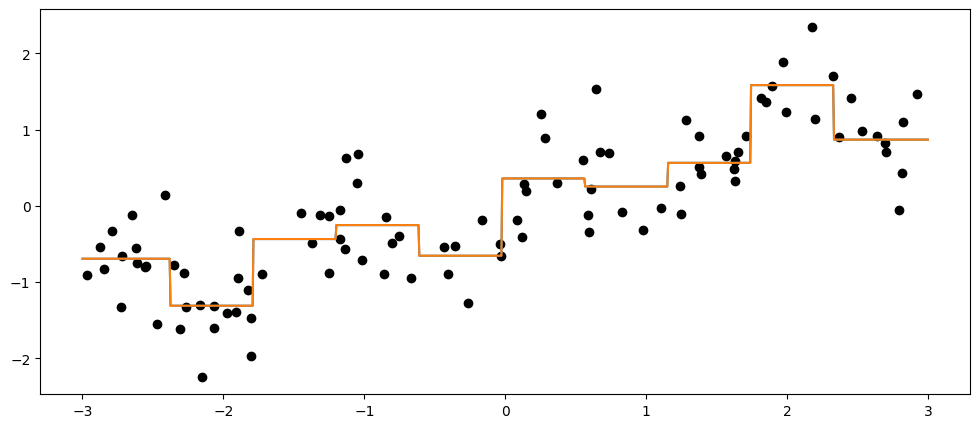

In [47]:
linreg2 = LinearRegression().fit(x_binned, y)
tree2 = DecisionTreeRegressor(min_samples_leaf=3).fit(x_binned, y)


plt.figure(figsize=(12, 5))
plt.scatter(x[:,0], y, color = 'black')
plt.plot(line, linreg2.predict(line_binned), label='binned_lin_reg')
plt.plot(line, tree2.predict(line_binned), label='binned_tree_reg')
plt.show()

In [44]:
x_combinned = np.hstack([x, x_binned])

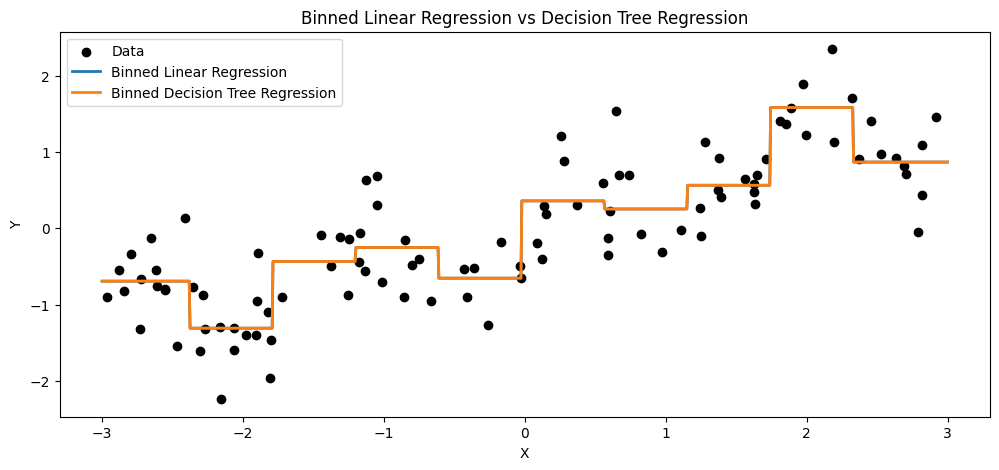

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer

# 데이터 생성 함수
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

# 데이터 생성
x, y = make_wave()

# KBinsDiscretizer를 사용하여 이산화 데이터 생성
binning = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')
x_binned = binning.fit_transform(x)

# line 데이터 준비
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
line_binned = binning.transform(line)

# 두 모델 학습
linreg3 = LinearRegression().fit(x_binned, y)
tree3 = DecisionTreeRegressor(min_samples_leaf=3).fit(x_binned, y)

# 두 모델 예측
line2 = line_binned  # 예측 시 동일한 차원으로 사용

# 그래프 그리기
plt.figure(figsize=(12, 5))
plt.scatter(x[:, 0], y, color='black', label='Data')
plt.plot(line, linreg3.predict(line2), label='Binned Linear Regression', linewidth=2)
plt.plot(line, tree3.predict(line2), label='Binned Decision Tree Regression', linewidth=2)
plt.legend()
plt.title("Binned Linear Regression vs Decision Tree Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

ValueError: X has 11 features, but DecisionTreeRegressor is expecting 10 features as input.

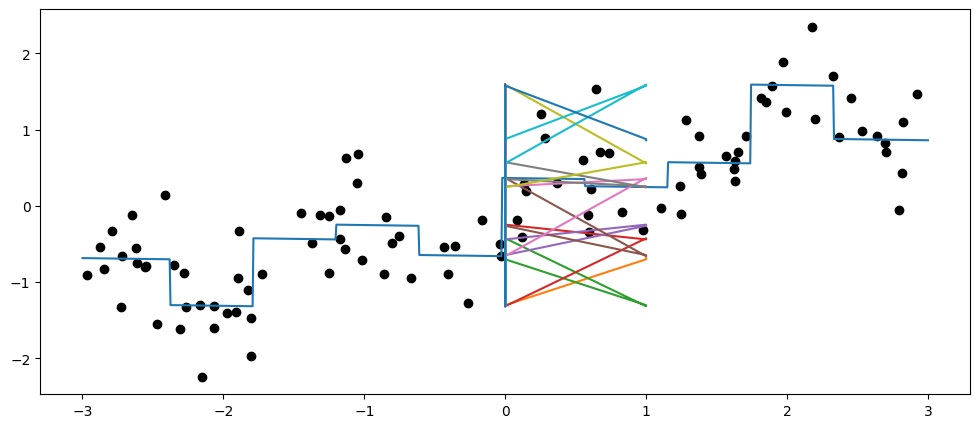

In [45]:
linreg3 = LinearRegression().fit(x_combinned, y)
tree3 = DecisionTreeRegressor(min_samples_leaf=3).fit(x_binned, y)
line2 = np.hstack([line, line_binned])

plt.figure(figsize=(12, 5))
plt.scatter(x[:,0], y, color = 'black')
plt.plot(line2, linreg3.predict(line2), label='binned_lin_reg')
plt.plot(line2, tree3.predict(line2), label='binned_tree_reg')
plt.show()